### Data Preprocessing (site2, Office)

In [2]:
import pandas as pd

In [34]:
train.head()

,timestamp,meter_reading
0,2016-01-01 00:00:00,28.10
1,2016-01-01 01:00:00,26.57
2,2016-01-01 02:00:00,25.73
3,2016-01-01 03:00:00,25.96
4,2016-01-01 04:00:00,25.59


In [21]:
train = pd.read_csv("alltime.csv")
w_train = pd.read_csv("data/weather_train.csv")
meta_building = pd.read_csv("data/building_metadata.csv")

In [22]:
train.head()

,timestamp,meter_reading
0,2016-01-01 0:00,28.10
1,2016-01-01 1:00,26.57
2,2016-01-01 2:00,25.73
3,2016-01-01 3:00,25.96
4,2016-01-01 4:00,25.59


In [51]:
b0_weather = w_train[w_train['site_id'] == 2]

In [52]:
b0_weather.isnull().sum()

site_id                  0
timestamp                0
air_temperature          1
cloud_coverage        2354
dew_temperature          1
precip_depth_1_hr       66
sea_level_pressure      44
wind_direction         591
wind_speed               5
dtype: int64

In [53]:
b0_weather.shape

(8783, 9)

In [54]:
import matplotlib.pyplot as plt

In [55]:
b0_weather = b0_weather.drop(columns = ['cloud_coverage'])

In [56]:
b0_weather.isnull().sum()

site_id                 0
timestamp               0
air_temperature         1
dew_temperature         1
precip_depth_1_hr      66
sea_level_pressure     44
wind_direction        591
wind_speed              5
dtype: int64

In [57]:
b0_weather = b0_weather.fillna(method = "bfill")

In [58]:
date_tmp = train['timestamp']

KeyError: 'timestamp'

In [59]:
train.head()

,meter_reading
timestamp,
2016-01-01 00:00:00,28.10
2016-01-01 01:00:00,26.57
2016-01-01 02:00:00,25.73
2016-01-01 03:00:00,25.96
2016-01-01 04:00:00,25.59


In [60]:
b0_weather.head()

,site_id,timestamp,air_temperature,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed
17547,2,2016-01-01 00:00:00,15.6,-5.6,0.0,1015.3,270.0,3.6
17548,2,2016-01-01 01:00:00,13.9,-5.6,0.0,1015.6,270.0,4.1
17549,2,2016-01-01 02:00:00,13.3,-5.6,0.0,1016.0,270.0,3.1
17550,2,2016-01-01 03:00:00,12.2,-6.1,0.0,1016.6,280.0,3.1
17551,2,2016-01-01 04:00:00,11.7,-6.7,0.0,1017.0,270.0,3.1


In [61]:
b0_weather = b0_weather.set_index('timestamp')

In [62]:
train = train.set_index('timestamp')

KeyError: 'timestamp'

In [63]:
b0_weather.head()

,site_id,air_temperature,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed
timestamp,,,,,,,
2016-01-01 00:00:00,2,15.6,-5.6,0.0,1015.3,270.0,3.6
2016-01-01 01:00:00,2,13.9,-5.6,0.0,1015.6,270.0,4.1
2016-01-01 02:00:00,2,13.3,-5.6,0.0,1016.0,270.0,3.1
2016-01-01 03:00:00,2,12.2,-6.1,0.0,1016.6,280.0,3.1
2016-01-01 04:00:00,2,11.7,-6.7,0.0,1017.0,270.0,3.1


In [37]:
train.head()

,meter_reading
timestamp,
2016-01-01 00:00:00,28.10
2016-01-01 01:00:00,26.57
2016-01-01 02:00:00,25.73
2016-01-01 03:00:00,25.96
2016-01-01 04:00:00,25.59


In [64]:
mer_b0 = pd.merge(train, b0_weather, left_index = True, right_index = True ,how = 'left')

In [65]:
mer_b0.head()

,meter_reading,site_id,air_temperature,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed
timestamp,,,,,,,,
2016-01-01 00:00:00,28.10,2.0,15.6,-5.6,0.0,1015.3,270.0,3.6
2016-01-01 01:00:00,26.57,2.0,13.9,-5.6,0.0,1015.6,270.0,4.1
2016-01-01 02:00:00,25.73,2.0,13.3,-5.6,0.0,1016.0,270.0,3.1
2016-01-01 03:00:00,25.96,2.0,12.2,-6.1,0.0,1016.6,280.0,3.1
2016-01-01 04:00:00,25.59,2.0,11.7,-6.7,0.0,1017.0,270.0,3.1


In [68]:
mer_b0.to_csv('mer_weather.csv')

### Application
used https://machinelearningmastery.com/multivariate-time-series-forecasting-lstms-keras/

In [2]:
import pandas as pd
mer_b0=pd.read_csv('mer_weather.csv')

In [3]:
dataset=mer_b0.drop(['site_id'], axis=1)

In [7]:
dataset=dataset.set_index('timestamp')

In [10]:
dataset.head()

,meter_reading,air_temperature,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed
timestamp,,,,,,,
2016-01-01 00:00:00,28.10,15.6,-5.6,0.0,156.0,270.0,3.6
2016-01-01 01:00:00,26.57,13.9,-5.6,0.0,159.0,270.0,4.1
2016-01-01 02:00:00,25.73,13.3,-5.6,0.0,163.0,270.0,3.1
2016-01-01 03:00:00,25.96,12.2,-6.1,0.0,169.0,280.0,3.1
2016-01-01 04:00:00,25.59,11.7,-6.7,0.0,173.0,270.0,3.1


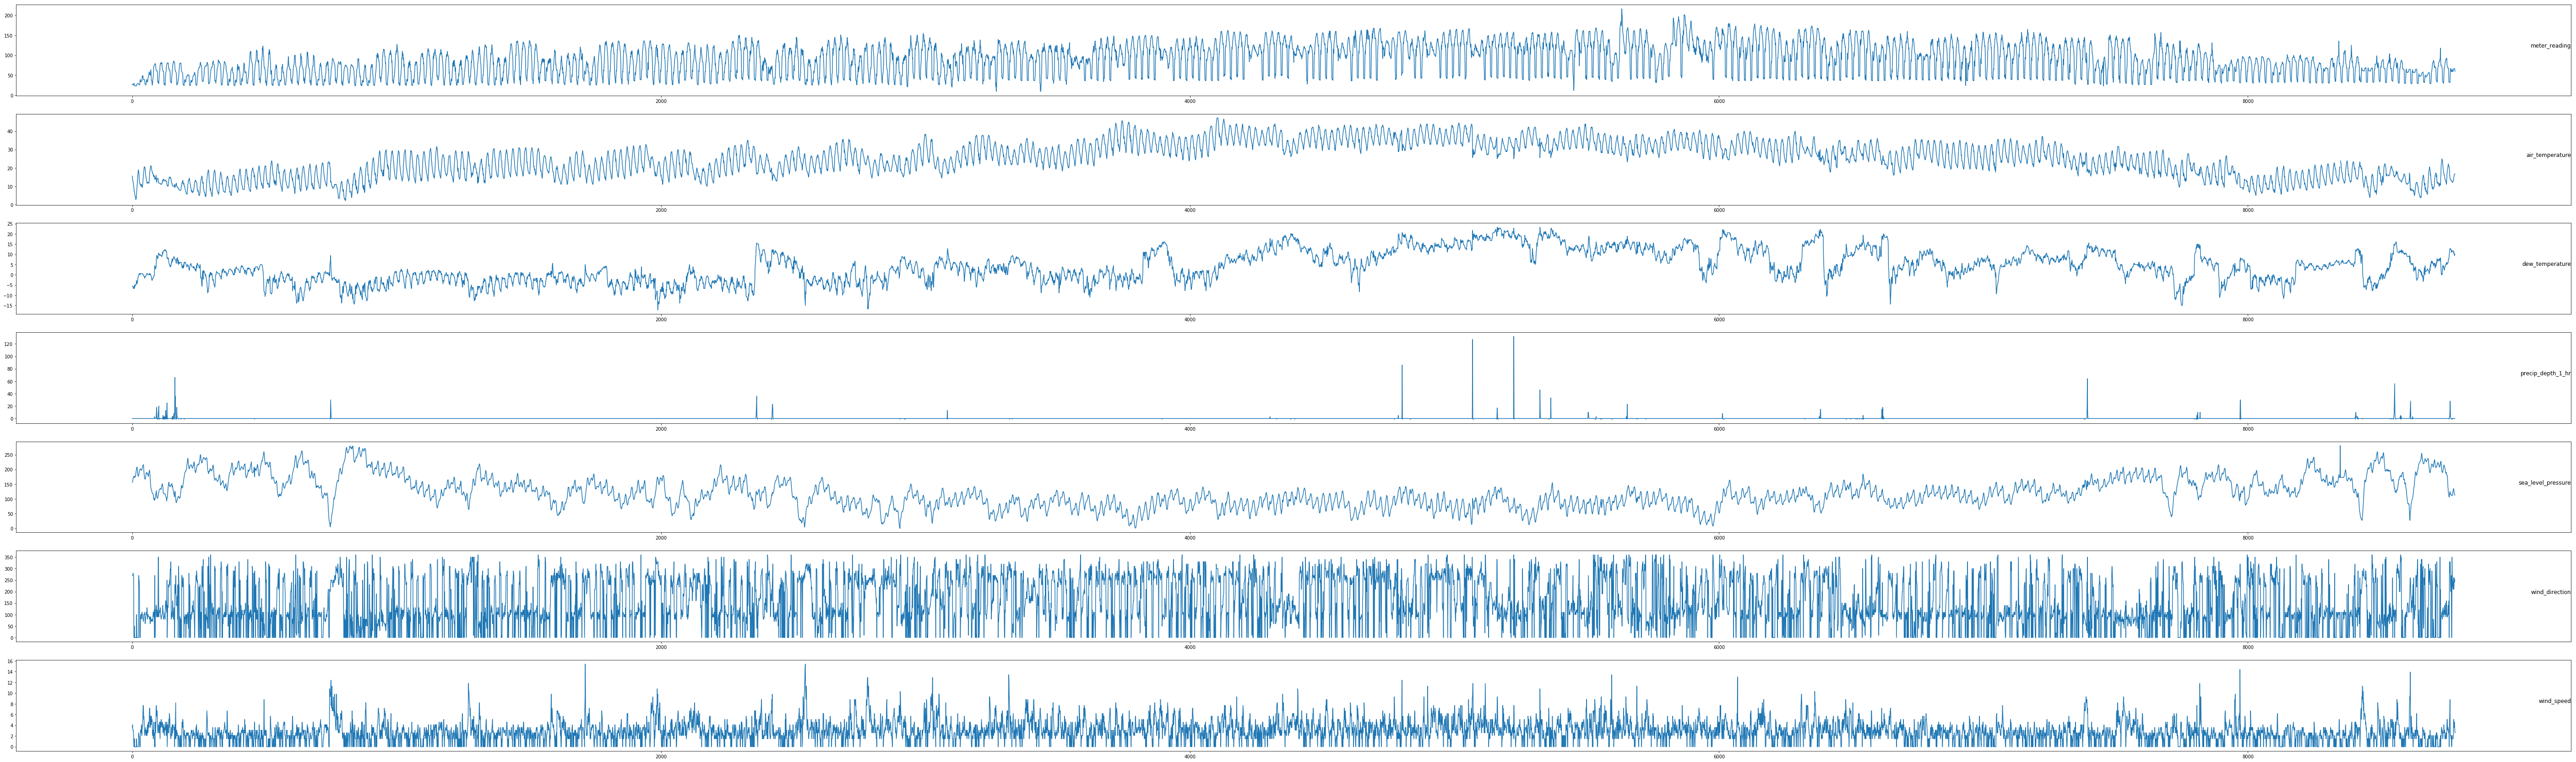

In [9]:
from matplotlib import pyplot
values = dataset.values
# specify columns to plot
groups = [0, 1, 2, 3, 4, 5, 6]
i = 1
# plot each column
pyplot.figure(figsize=(100,30))
for group in groups:
	pyplot.subplot(len(groups), 1, i)
	pyplot.plot(values[:, group])
	pyplot.title(dataset.columns[group], y=0.5, loc='right')
	i += 1
pyplot.show()

In [11]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
	n_vars = 1 if type(data) is list else data.shape[1]
	df = pd.DataFrame(data)
	cols, names = list(), list()
	# input sequence (t-n, ... t-1)
	for i in range(n_in, 0, -1):
		cols.append(df.shift(i))
		names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
	# forecast sequence (t, t+1, ... t+n)
	for i in range(0, n_out):
		cols.append(df.shift(-i))
		if i == 0:
			names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
		else:
			names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
	# put it all together
	agg = pd.concat(cols, axis=1)
	agg.columns = names
	# drop rows with NaN values
	if dropnan:
		agg.dropna(inplace=True)
	return agg
 
# load dataset
values = dataset.values
# integer encode direction
encoder = LabelEncoder()
values[:,4] = encoder.fit_transform(values[:,4])
# ensure all data is float
values = values.astype('float32')
# normalize features
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)
# frame as supervised learning
reframed = series_to_supervised(scaled, 1, 1)
# drop columns we don't want to predict
reframed.drop(reframed.columns[[8,9,10,11,12,13]], axis=1, inplace=True)
print(reframed.head())

   var1(t-1)  var2(t-1)  var3(t-1)  var4(t-1)  var5(t-1)  var6(t-1)  \
1   0.090175   0.297778   0.286420   0.007519   0.555160   0.750000   
2   0.082777   0.260000   0.286420   0.007519   0.565836   0.750000   
3   0.078716   0.246667   0.286420   0.007519   0.580071   0.750000   
4   0.079828   0.222222   0.274074   0.007519   0.601424   0.777778   
5   0.078039   0.211111   0.259259   0.007519   0.615658   0.750000   

   var7(t-1)   var1(t)  
1   0.233766  0.082777  
2   0.266234  0.078716  
3   0.201299  0.079828  
4   0.201299  0.078039  
5   0.201299  0.081520  


In [12]:
#split train and test
values = reframed.values
n_train_hours = 200*24
train = values[:n_train_hours, :]
test = values[n_train_hours:, :]
# split into input and outputs
train_X, train_y = train[:, :-1], train[:, -1]
test_X, test_y = test[:, :-1], test[:, -1]
# reshape input to be 3D [samples, timesteps, features]
train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

(4800, 1, 7) (4800,) (3981, 1, 7) (3981,)


In [28]:
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

(4800, 1, 7) (4800,) (3981, 7) (3981,)


In [19]:
import tensorflow as tf
import keras

Using TensorFlow backend.


In [23]:
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.layers import LSTM
from tensorflow.keras import Sequential

# design network
model = Sequential()
model.add(LSTM(50, input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(Dense(1))
model.compile(loss='mae', optimizer='adam')

Instructions for updating:
Colocations handled automatically by placer.


In [24]:
# fit network
history = model.fit(train_X, train_y, epochs=50, batch_size=72, validation_data=(test_X, test_y), verbose=2, shuffle=False)

Train on 4800 samples, validate on 3981 samples
Instructions for updating:
Use tf.cast instead.
Epoch 1/50
 - 3s - loss: 0.1644 - val_loss: 0.1347
Epoch 2/50
 - 0s - loss: 0.1191 - val_loss: 0.1150
Epoch 3/50
 - 0s - loss: 0.0988 - val_loss: 0.0928
Epoch 4/50
 - 0s - loss: 0.0794 - val_loss: 0.0776
Epoch 5/50
 - 1s - loss: 0.0646 - val_loss: 0.0619
Epoch 6/50
 - 0s - loss: 0.0511 - val_loss: 0.0507
Epoch 7/50
 - 0s - loss: 0.0434 - val_loss: 0.0521
Epoch 8/50
 - 0s - loss: 0.0428 - val_loss: 0.0516
Epoch 9/50
 - 0s - loss: 0.0428 - val_loss: 0.0527
Epoch 10/50
 - 0s - loss: 0.0427 - val_loss: 0.0531
Epoch 11/50
 - 0s - loss: 0.0429 - val_loss: 0.0532
Epoch 12/50
 - 0s - loss: 0.0429 - val_loss: 0.0536
Epoch 13/50
 - 0s - loss: 0.0429 - val_loss: 0.0542
Epoch 14/50
 - 0s - loss: 0.0430 - val_loss: 0.0544
Epoch 15/50
 - 0s - loss: 0.0430 - val_loss: 0.0546
Epoch 16/50
 - 0s - loss: 0.0431 - val_loss: 0.0539
Epoch 17/50
 - 0s - loss: 0.0428 - val_loss: 0.0537
Epoch 18/50
 - 0s - loss: 0.0

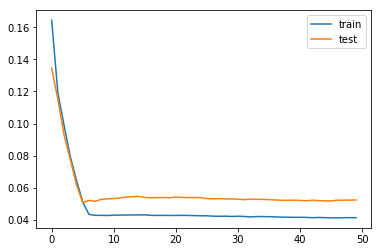

In [25]:
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

In [35]:
import numpy as np
import math
from sklearn.metrics import mean_squared_error

test_X, test_y = test[:, :-1], test[:, -1]
# reshape test input to be 3D [samples, timesteps, features]
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))

# make a prediction
yhat = model.predict(test_X)
test_X = test_X.reshape((test_X.shape[0], test_X.shape[2]))
# invert scaling for forecast
inv_yhat = np.concatenate((yhat, test_X[:, 1:]), axis=1)
inv_yhat = scaler.inverse_transform(inv_yhat)
inv_yhat = inv_yhat[:,0]
# invert scaling for actual
test_y = test_y.reshape((len(test_y), 1))
inv_y = np.concatenate((test_y, test_X[:, 1:]), axis=1)
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:,0]
# calculate RMSE
rmse = math.sqrt(mean_squared_error(inv_y, inv_yhat))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 15.760


### EDA

In [75]:
r=np.concatenate((yhat, test_X[:, 1:]), axis=1)
r=scaler.inverse_transform(r)
r=pd.DataFrame(r)

In [72]:
len(r[0])

3981

In [87]:
graph_all=pd.DataFrame(dataset['meter_reading'])
graph_test=pd.DataFrame(dataset[n_train_hours:]['meter_reading'])

In [107]:
x=pd.DataFrame(r[0])

In [104]:
import datetime

dt = datetime.datetime(2016, 7, 19)
end = datetime.datetime(2016, 12, 31, 23, 0, 0)
step = datetime.timedelta(minutes=60)

result = []

while dt < end:
    result.append(dt.strftime('%Y-%m-%d %H:%M:%S'))
    dt += step

In [115]:
rr=pd.DataFrame(result)

In [120]:
uu=pd.concat([rr,r[0]],axis=1)
uu.columns=['timestamp','meter_reading_pred']
uu.set_index('timestamp')

,meter_reading_pred
timestamp,
2016-07-19 00:00:00,48.215179
2016-07-19 01:00:00,53.218391
2016-07-19 02:00:00,33.583771
2016-07-19 03:00:00,59.172085
2016-07-19 04:00:00,59.167030
2016-07-19 05:00:00,102.553482
2016-07-19 06:00:00,132.982300
2016-07-19 07:00:00,127.194450
2016-07-19 08:00:00,138.270126


In [130]:
uu=uu.dropna()

In [140]:
def plot_series(time, series, format="-",start=0,end=None):
    plt.plot(time[start:end],series[start:end],format)
    plt.xlabel("Time")
    plt.ylabel("meter reading")
    plt.grid(True)

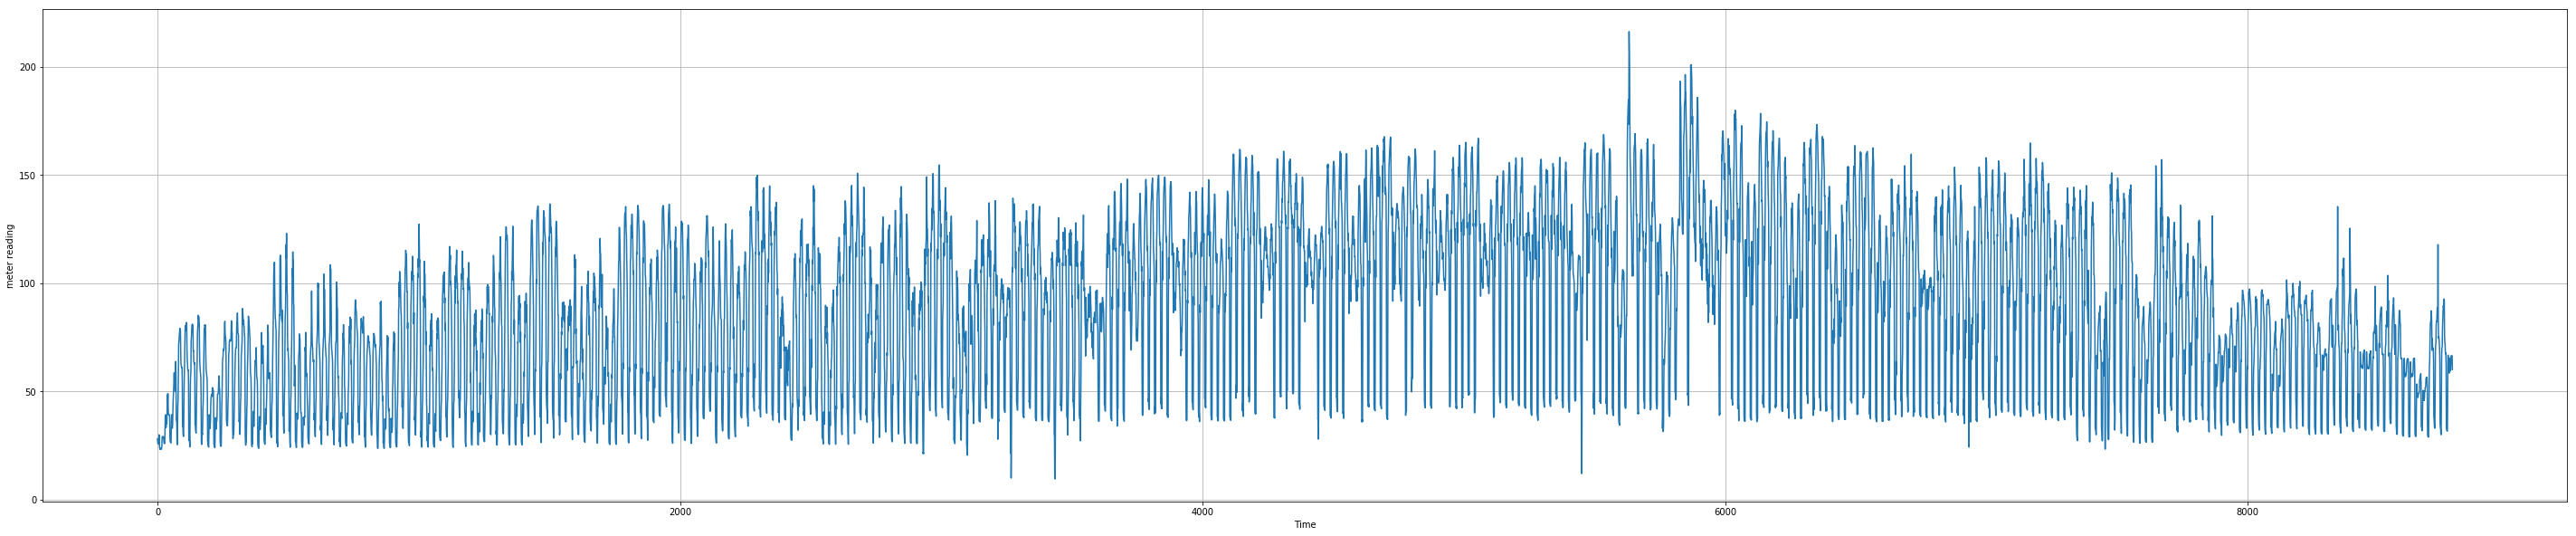

In [61]:
import matplotlib.pyplot as plt
series = np.array(graph_all)
time_step=[]
for x in range(len(series)):
    time_step.append(x)
time=np.array(time_step)
plot_series(time,series)

In [137]:
graph_test=graph_test[:-3]

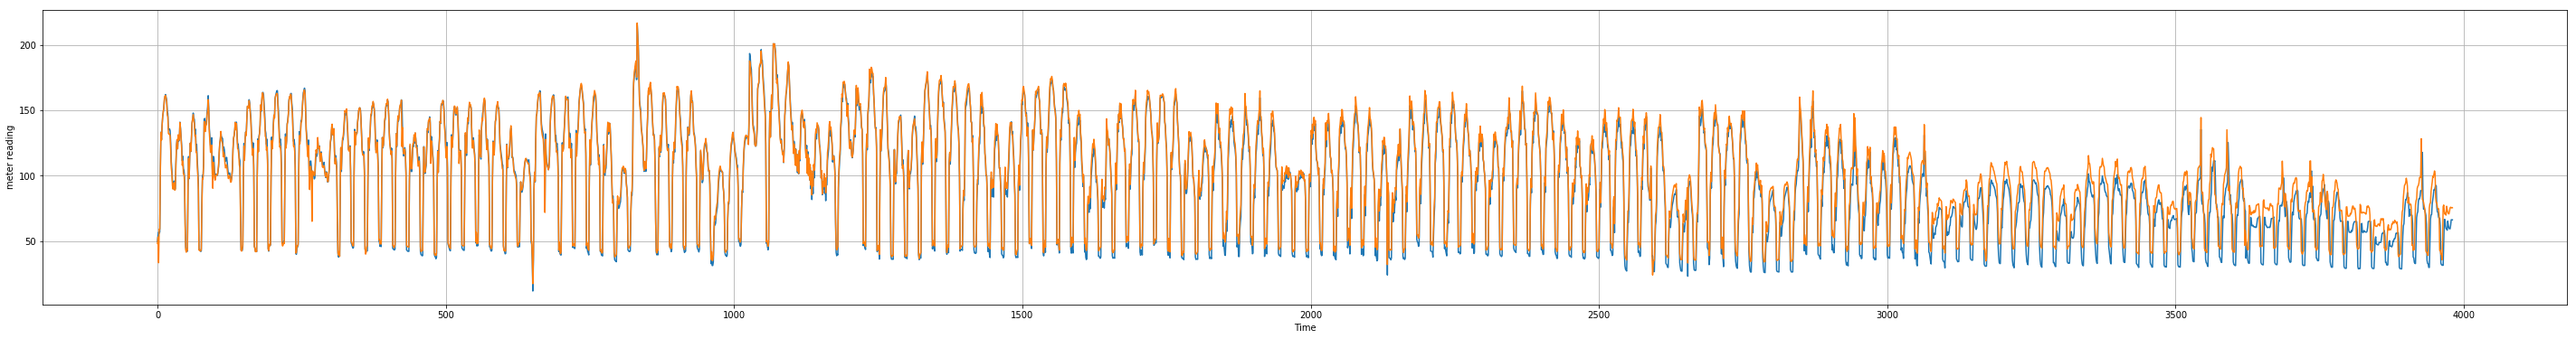

In [141]:
import matplotlib.pyplot as plt
series = np.array(graph_test)
time_step=[]
for x in range(len(series)):
    time_step.append(x)
time=np.array(time_step)
plt.figure(figsize=(50, 6))
plot_series(time,series)
plot_series(time,r[0])

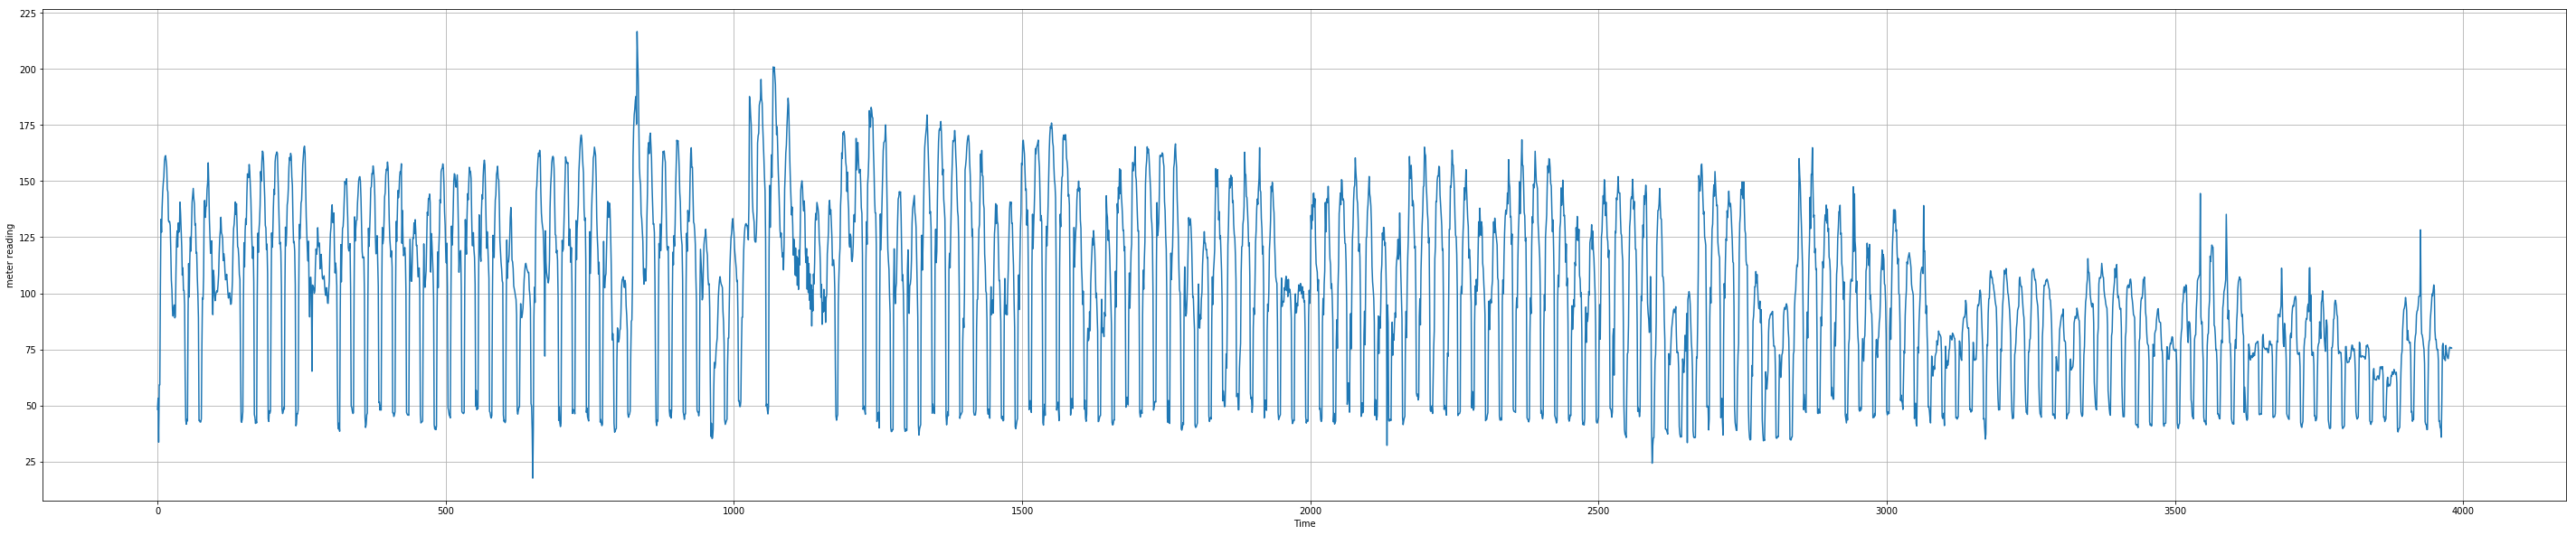

In [132]:
import matplotlib.pyplot as plt
series = np.array(r[0])
time_step=[]
for x in range(len(series)):
    time_step.append(x)
time=np.array(time_step)
plot_series(time,series)